In [1]:
import pandas as pd
import csv

data = pd.read_csv(
    'book_info.csv',
    delimiter=';',           # используем точку с запятой
    quoting=csv.QUOTE_NONE,  # игнорируем кавычки
    encoding='utf-8',
    on_bad_lines='skip'      # пропускаем проблемные строки
)

data.head()

,title,author,categories,pageCount,averageRating,ratingsCount,publishedDate,description
0,1876,Gore Vidal,Fiction,385.0,NaN,NaN,2018-08-22,The third volume of Gore Vidal's magnificent s...
1,"""""""...And Ladies of the Club""""""",Helen Hooven Santmyer,NaN,1433.0,NaN,NaN,1986,NaN
2,11/22/63,Stephen King,Fiction,866.0,4.0,2.0,2011-11-08,"ON NOVEMBER 22, 1963, THREE SHOTS RANG OUT IN ..."
3,2010: Odyssey Two,Arthur C. Clarke,Fiction,328.0,3.0,1.0,1982,"""""""A daring romp through the solar system and ..."
4,A Court of Mist and Fury,Sarah J. Maas,Fiction,678.0,4.5,4.0,2016-05-03,The second instalment of the GLOBAL PHENOMENON...


In [2]:
print(len(data))

494


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time


def get_place_of_birth_from_wikipedia(author_name):
    try:
        name = author_name.replace(' ', '_')
        url = f"https://en.wikipedia.org/wiki/{name}"
        headers = {"User-Agent": "Mozilla/5.0"}
        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            return None

        soup = BeautifulSoup(response.text, 'html.parser')
        infobox = soup.find('table', class_='infobox')
        if not infobox:
            return None

        for row in infobox.find_all('tr'):
            header = row.find('th')
            if header and 'born' in header.text.lower():
                born_cell = row.find('td')
                if born_cell:
                    text = born_cell.get_text(separator='\n').strip()
                    lines = text.split('\n')
                    if len(lines) > 1:
                        place_line = lines[-1]
                        parts = [p.strip() for p in place_line.split(',')]
                        if parts:
                            return parts[-1]  
        return None
    except Exception:
        return None


df = pd.read_csv('book_info.csv', delimiter=';', on_bad_lines='skip')

authors = df['author'].dropna().unique()

author_place = {}

for author in authors:
    country = get_place_of_birth_from_wikipedia(author)
    author_place[author] = country
    time.sleep(1)  


df['place'] = df['author'].map(author_place)

In [3]:
df.head()

,title,author,categories,pageCount,averageRating,ratingsCount,publishedDate,description,place
0,1876,Gore Vidal,Fiction,385.0,NaN,NaN,2018-08-22,The third volume of Gore Vidal's magnificent s...,U.S.
1,"""...And Ladies of the Club""",Helen Hooven Santmyer,NaN,1433.0,NaN,NaN,1986,NaN,U.S.
2,11/22/63,Stephen King,Fiction,866.0,4.0,2.0,2011-11-08,"ON NOVEMBER 22, 1963, THREE SHOTS RANG OUT IN ...",U.S.
3,2010: Odyssey Two,Arthur C. Clarke,Fiction,328.0,3.0,1.0,1982,"""A daring romp through the solar system and a ...",England
4,A Court of Mist and Fury,Sarah J. Maas,Fiction,678.0,4.5,4.0,2016-05-03,The second instalment of the GLOBAL PHENOMENON...,U.S.


In [6]:
df['author'].value_counts()

author
Stephen King            33
Danielle Steel          32
John Grisham            31
James Patterson         14
Tom Clancy              12
                        ..
Richard Adams            1
Delia Owens              1
Stephen R. Donaldson     1
R.J. Palacio             1
Jen Sincero              1
Name: count, Length: 181, dtype: int64

In [ ]:
def extract_year(published_date):
    try:
        if isinstance(published_date, str) and published_date[:4].isdigit():
            return int(published_date[:4])
    except:
        pass
    return None


df['year'] = df['publishedDate'].apply(extract_year).astype('Int64')

df = df[['year', 'place'] + [c for c in df.columns if c not in ['year', 'place']]]

df.to_csv('book_info_final.csv', index=False, encoding='utf-8')

In [5]:
df.head()

,year,place,title,author,categories,pageCount,averageRating,ratingsCount,publishedDate,description
0,2018,U.S.,1876,Gore Vidal,Fiction,385.0,NaN,NaN,2018-08-22,The third volume of Gore Vidal's magnificent s...
1,1986,U.S.,"""...And Ladies of the Club""",Helen Hooven Santmyer,NaN,1433.0,NaN,NaN,1986,NaN
2,2011,U.S.,11/22/63,Stephen King,Fiction,866.0,4.0,2.0,2011-11-08,"ON NOVEMBER 22, 1963, THREE SHOTS RANG OUT IN ..."
3,1982,England,2010: Odyssey Two,Arthur C. Clarke,Fiction,328.0,3.0,1.0,1982,"""A daring romp through the solar system and a ..."
4,2016,U.S.,A Court of Mist and Fury,Sarah J. Maas,Fiction,678.0,4.5,4.0,2016-05-03,The second instalment of the GLOBAL PHENOMENON...


In [2]:
import pandas as pd


data = pd.read_csv('book_info_final.csv', dtype={'year': 'Int64'})

data.head()

,year,place,title,author,categories,pageCount,averageRating,ratingsCount,publishedDate,description
0,2018,U.S.,1876,Gore Vidal,Fiction,385.0,NaN,NaN,2018-08-22,The third volume of Gore Vidal's magnificent s...
1,1986,U.S.,"""...And Ladies of the Club""",Helen Hooven Santmyer,NaN,1433.0,NaN,NaN,1986,NaN
2,2011,U.S.,11/22/63,Stephen King,Fiction,866.0,4.0,2.0,2011-11-08,"ON NOVEMBER 22, 1963, THREE SHOTS RANG OUT IN ..."
3,1982,England,2010: Odyssey Two,Arthur C. Clarke,Fiction,328.0,3.0,1.0,1982,"""A daring romp through the solar system and a ..."
4,2016,U.S.,A Court of Mist and Fury,Sarah J. Maas,Fiction,678.0,4.5,4.0,2016-05-03,The second instalment of the GLOBAL PHENOMENON...


In [3]:
# print(len(data))

# print(len(data['year'].value_counts()))

# data['year'].value_counts()

print(f"This dataset has {len(data)} records over {len(data['year'].value_counts())} years.")

This dataset has 509 records over 58 years.


In [4]:
null_counts = data.isnull().sum()


ind_avg_rating = null_counts.index.get_loc('averageRating')

ind_page_count = null_counts.index.get_loc('pageCount')

ind_rate_count = null_counts.index.get_loc('ratingsCount')


if ind_avg_rating:
    print(f"Number of missing values of 'averageRating' column is {data.isnull().sum().iloc[ind_avg_rating]}.")
else:
    print("There is no missing values in 'averageRating' column.")

if ind_page_count:
    print(f"Number of missing values of 'pageCount' column is {data.isnull().sum().iloc[ind_page_count]}.")
else:
    print("There is no missing values in 'pageCount' column.")

if ind_rate_count:
    print(f"Number of missing values of 'ratingsCount' column is {data.isnull().sum().iloc[ind_rate_count]}.")
else:
    print("There is no missing values in 'ratingsCount' column.")


Number of missing values of 'averageRating' column is 315.
Number of missing values of 'pageCount' column is 16.
Number of missing values of 'ratingsCount' column is 315.


In [5]:
top_genres = data['categories'].value_counts().head(5)

print("The most popular genres:\n")
for i, (genre, count) in enumerate(top_genres.items(), start=1):
    print(f"{i}. {genre} - {count}")


The most popular genres:

1. Fiction - 379
2. Juvenile Fiction - 32
3. Young Adult Fiction - 9
4. Body, Mind & Spirit - 3
5. Historical fiction - 2


In [6]:
avg_pages_per_year = data.groupby('year')['pageCount'].mean().reset_index()

avg_pages_per_year.head()

,year,pageCount
0,1943,NaN
1,1960,296.0
2,1969,518.0
3,1970,744.0
4,1971,463.0


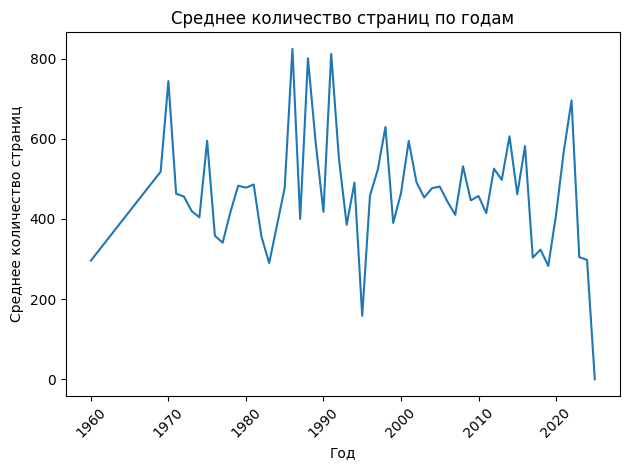

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.lineplot(
    x='year',
    y='pageCount',
    data=avg_pages_per_year
)

plt.title('Среднее количество страниц по годам')
plt.xlabel('Год')
plt.ylabel('Среднее количество страниц')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

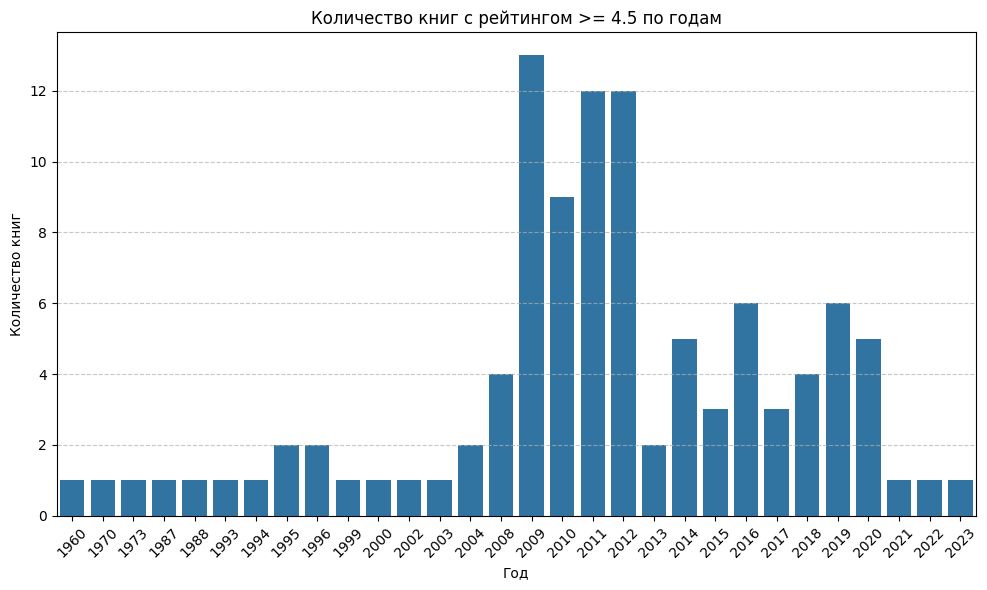

In [8]:
high_rate_books = data[data['averageRating'] >= 4.5]

top_years = high_rate_books['year'].value_counts().sort_index()


plt.figure(figsize=(10, 6))
sns.barplot(x=top_years.index, y=top_years.values)

plt.title('Количество книг с рейтингом >= 4.5 по годам')
plt.xlabel('Год')
plt.ylabel('Количество книг')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

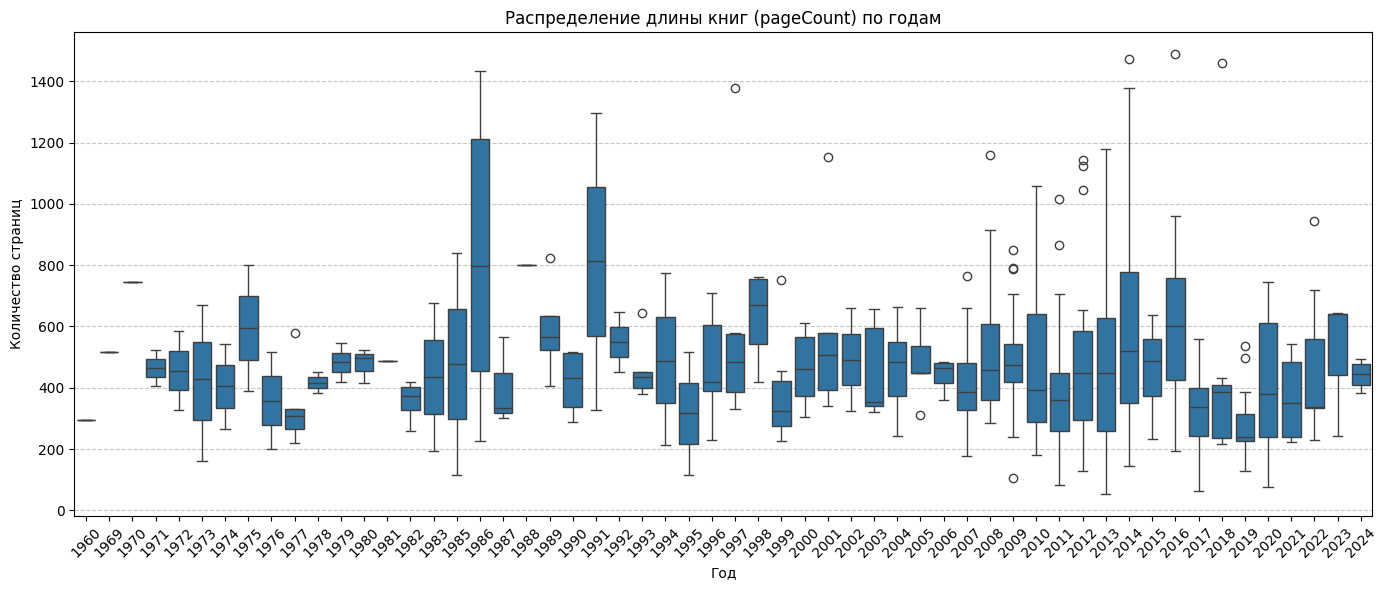

In [ ]:
filtered_data = data[
    (data['pageCount'] <= 1500) &
    (data['pageCount'] > 50) &
    (data['year'] >= 1950) &
    (data['year'] <= 2025)
]


plt.figure(figsize=(14, 6))
sns.boxplot(x='year', y='pageCount', data=filtered_data)

plt.title('Распределение длины книг (pageCount) по годам')
plt.xlabel('Год')
plt.ylabel('Количество страниц')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


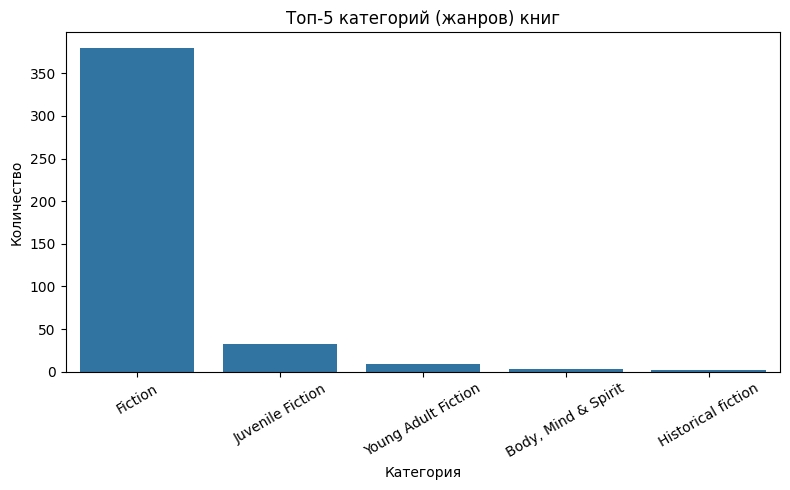

In [10]:
top_cat_counts = data[data['categories'].isin(top_genres.index)]


plt.figure(figsize=(8, 5))
sns.countplot(x ='categories', data = top_cat_counts)

plt.title("Топ-5 категорий (жанров) книг")
plt.xlabel("Категория")
plt.ylabel("Количество")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

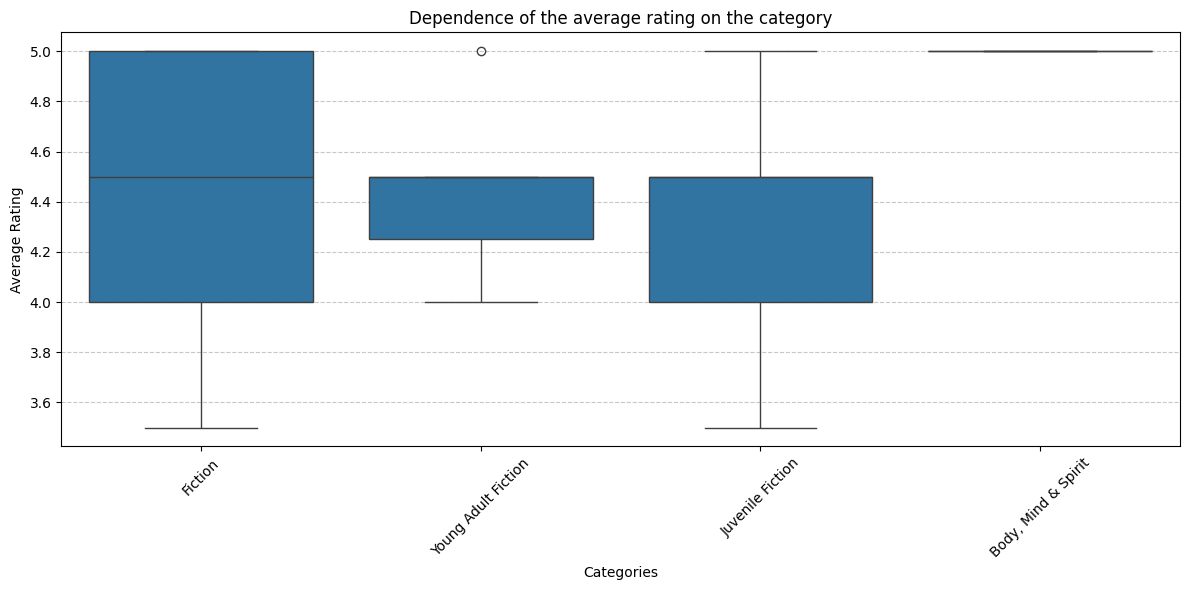

In [11]:
filt_rate = data[
    (data['averageRating'] >= 3.5) &
    (data['categories'].isin(top_genres.index))
    ]

plt.figure(figsize=(12, 6))
sns.boxplot(x='categories', y='averageRating', data=filt_rate)

plt.title('Dependence of the average rating on the category')
plt.xlabel('Categories')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# sample_size = 200
# first_variable = data['pageCount']
# second_variable = data['averageRating']
# categorical_variable = data['year']


# dataframe = pd.DataFrame(
#     {
#         "variable1": first_variable,
#         "variable2": second_variable,
#         "categorical_variable": categorical_variable,
#     }
# )

In [41]:
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x=data['pageCount'], y=data['averageRating'], sizes=(20, 200))
# plt.show()

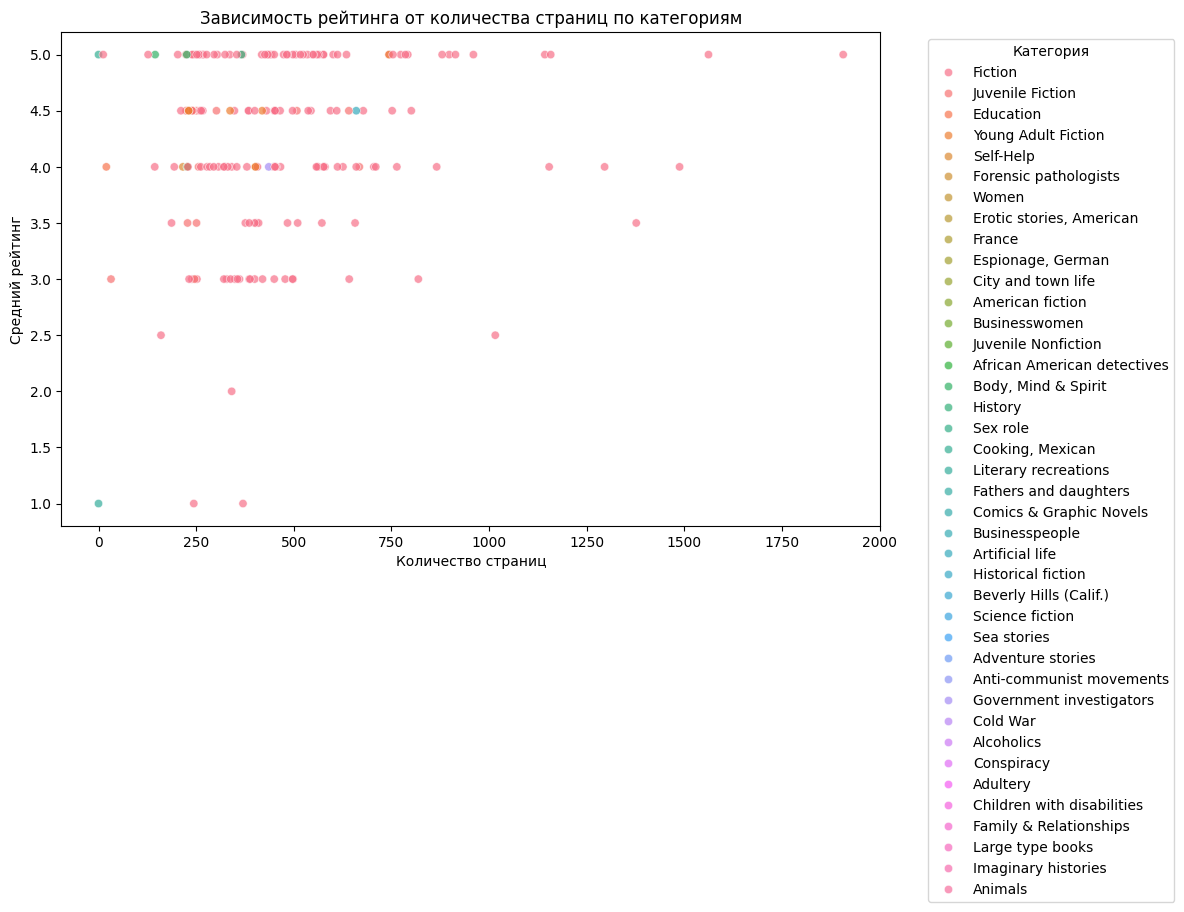

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='pageCount', y='averageRating', hue='categories', sizes=(20, 200), alpha=0.7)
plt.title('Зависимость рейтинга от количества страниц по категориям')
plt.xlabel('Количество страниц')
plt.ylabel('Средний рейтинг')
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


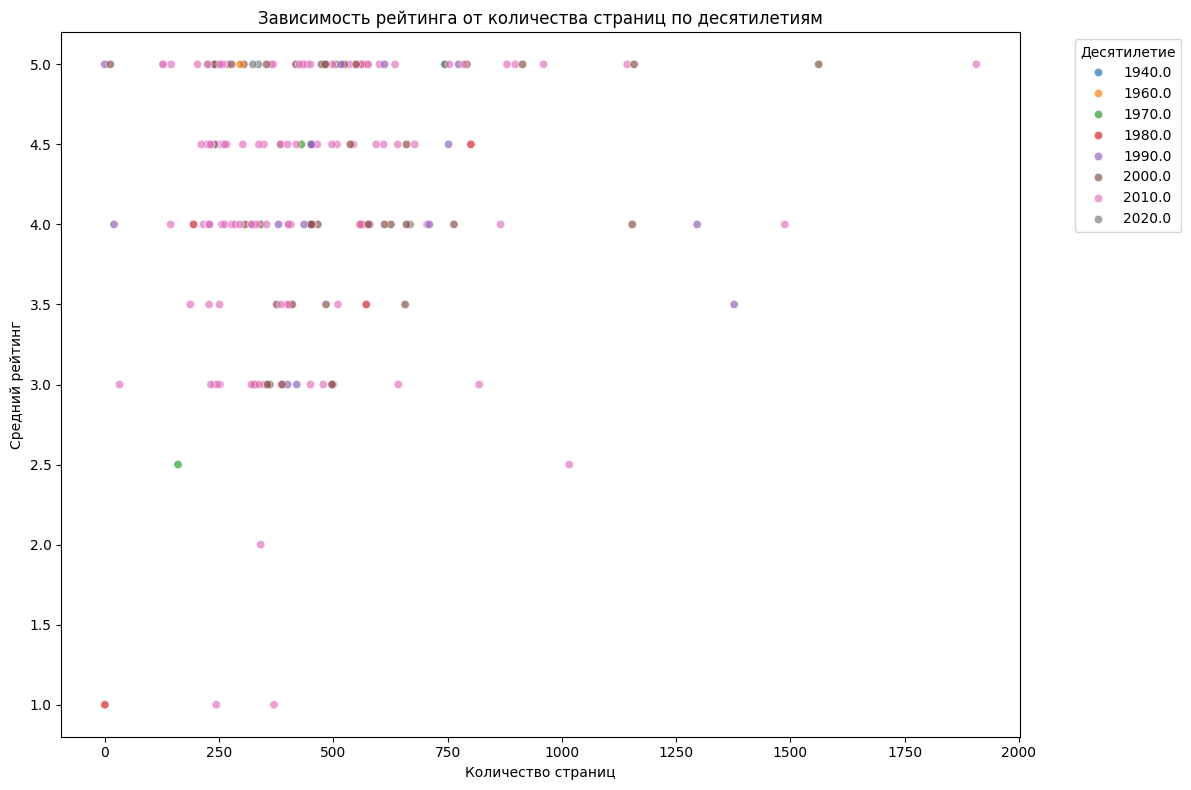

In [ ]:
# Удалим строки с пустыми значениями года
data['year'] = pd.to_numeric(data['year'], errors='coerce').astype('Int64')

# Преобразуем в обычный int и получим десятилетие
data['decade'] = (data['year'] // 10) * 10

# Строим график
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='pageCount', y='averageRating', hue='decade', palette='tab10', alpha=0.7)
plt.title('Зависимость рейтинга от количества страниц по десятилетиям')
plt.xlabel('Количество страниц')
plt.ylabel('Средний рейтинг')
plt.legend(title='Десятилетие', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


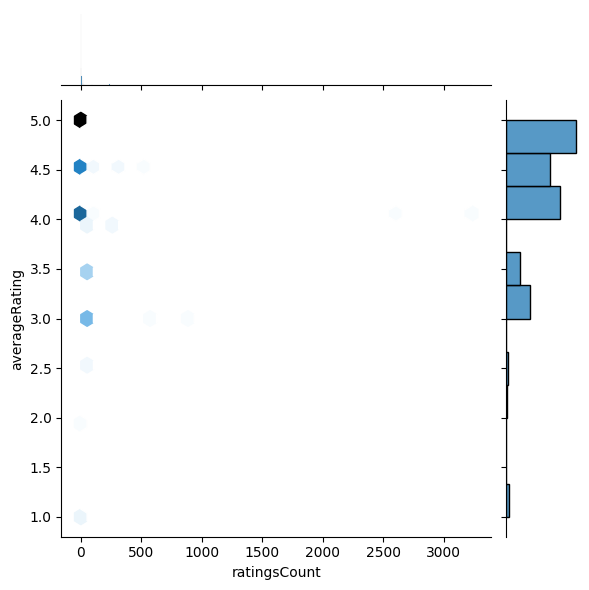

In [38]:
sns.jointplot(x="ratingsCount", y="averageRating", kind="hex", data=data, dropna = True)

plt.show()

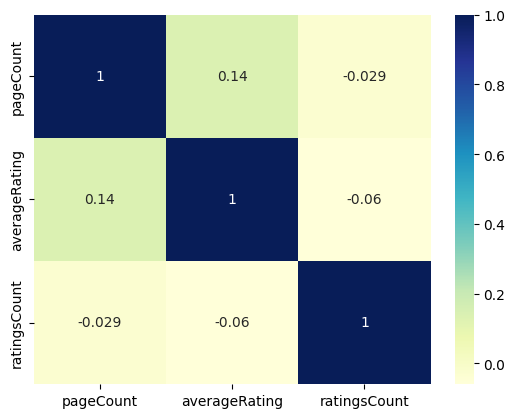

In [ ]:
heat_df = data[['pageCount', 'averageRating', 'ratingsCount']]


# Compute correlation matrix
co_mtx = heat_df.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

# Display heatmap
plt.show()